<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/day05/W1_D5_Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuromatch Academy 2020 - Dimensionality Reduction
## a. Tutorial 3 - Dimensionality reduction and reconstruction

In [0]:
#@title Video: Dimensionality

---

## b. Tutorial objectives
In this notebook we'll learn to apply PCA for dimensionality reduction, using the MNIST dataset of handwritten letters. We'll also learn how to use PCA for reconstruction and denoising.

Steps:
 1. Perform PCA on MNIST dataset.
 2. Calculate the variance explained.
 3. Reconstruct data with different numbers of PCs.
 4. Examine denoising using PCA.

---

Please execute the cells below to initialize the notebook environment.

---
### Imports and helper functions

In [0]:
def change_of_basis(X,W):
  """
  Projects data onto a new basis.
  
  Args:
    X (numpy array of floats) : Data matrix
                                each column corresponding to a different random variable
    W (numpy array of floats):  new orthonormal basis
                                columns correspond to basis vectors
  
  Returns: 
    (numpy array of floats) : Data matrix expressed in new basis
  """
  Y = np.matmul(X,W)
  return Y

def get_sample_cov_matrix(X):
  """
    Returns the sample covariance matrix of data X
    
    Args:
      X (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 
      
    Returns: 
      (numpy array of floats) : Covariance matrix
  """
  X = X - np.mean(X,0)
  cov_matrix = 1./X.shape[0]*np.matmul(X.T,X)
  return cov_matrix

def sort_evals_descending(evals,evectors):
  """
  DO NOT EDIT THIS FUNCTION!
  
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats):   Vector of eigenvalues 
    evectors (numpy array of floats):   Corresponding matrix of eigenvectors 
                                each column corresponds to a different eigenvalue 
    
  Returns: 
    (numpy array of floats) : Vector of eigenvalues after sorting
    (numpy array of floats) : Matrix of eigenvectors after sorting
  """
  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:,index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:,0], 1./np.sqrt(2)*np.array([1,1]))) > np.pi/2.:
      evectors[:,0] = -evectors[:,0]
    if np.arccos(np.matmul(evectors[:,1], 1./np.sqrt(2)*np.array([-1,1]))) > np.pi/2.:
      evectors[:,1] = -evectors[:,1]
  return evals, evectors

def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.
  
  Args:
     X (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 
     
  Returns: 
    (numpy array of floats) : Data projected onto the new basis
    (numpy array of floats) : Vector of eigenvalues
    (numpy array of floats) : Corresponding matrix of eigenvectors 
    
  """
  X = X - np.mean(X,0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eig(cov_matrix)
  evals, evectors = sort_evals_descending(evals,evectors)
  score = change_of_basis(X,evectors)
  return score, evectors, evals

def plot_eigenvalues(evals):
  """
  Plots eigenvalues.
  
  Args:
     (numpy array of floats) : Vector of eigenvalues
     
  Returns: 
    Nothing.
    
  """
  plt.figure()
  plt.plot(evals,'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.
  
  Args:
     variance_explained (numpy array of floats) : Vector of variance explained for each PC
     
  Returns: 
    Nothing.
    
  """
  plt.figure()
  plt.plot(variance_explained,'o-k')
  plt.xlabel('Component')
  plt.ylabel('Variance explained')

def plot_MNIST_reconstruction(X,X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed images.
  
  Args:
     X (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 
     X_reconstructed (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 
    
  Returns: 
    Nothing.
    
  """
  plt.figure()
  ax = plt.subplot(1,2,1)
  k=0
  for k1 in range(3):
    for k2 in range(3):
      k = k+1
      plt.imshow(np.reshape(X[k,:],(28,28)),extent=[(k1+1)*28,k1*28,(k2+1)*28,k2*28],vmin=0,vmax=255)
  plt.xlim((3*28,0))
  plt.ylim((3*28,0))
  plt.tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([]) 
  plt.title('Data')
  plt.clim([0,250])
  ax = plt.subplot(1,2,2)
  k=0
  for k1 in range(3):
    for k2 in range(3):
      k = k+1
      plt.imshow(np.reshape(X_reconstructed[k,:],(28,28)),extent=[(k1+1)*28,k1*28,(k2+1)*28,k2*28],vmin=0,vmax=255)
  plt.xlim((3*28,0))
  plt.ylim((3*28,0))
  plt.tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([]) 
  plt.clim([0,250])
  plt.title('Reconstructed')


def plot_MNIST(X):
  """
  Plots 9 images in the MNIST dataset.
  
  Args:
     X (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 

  Returns: 
    Nothing.
    
  """
  plt.figure()
  fig, ax = plt.subplots()
  k=0
  for k1 in range(3):
    for k2 in range(3):
      k = k+1
      plt.imshow(np.reshape(X[k,:],(28,28)),extent=[(k1+1)*28,k1*28,(k2+1)*28,k2*28],vmin=0,vmax=255)
  plt.xlim((3*28,0))
  plt.ylim((3*28,0))
  plt.tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False)
  plt.clim([0,250])
  ax.set_xticks([])
  ax.set_yticks([])

def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights, blue = 
  negative weights, white = zero weight.
  
  Args:
     weights (numpy array of floats) : PCA basis vector
     
  Returns: 
     Nothing.
    
  """
  plt.figure()
  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  plt.imshow(np.reshape(weights,(28,28)),cmap=cmap)
  plt.tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False)
  plt.clim(-.15,.15)
  plt.colorbar(ticks=[-.15,-.1,-.05,0,.05,.1,.15])
  ax.set_xticks([])
  ax.set_yticks([])

def add_noise(X,frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.
  
  Args:
     X (numpy array of floats) : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels
     
  Returns: 
     (numpy array of floats) : Data matrix + noise
    
  """
  X_noisy = np.reshape(X,(X.shape[0]*X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0],size= N_noise_ixs,replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0,255,noise_ixs.shape)
  X_noisy = np.reshape(X_noisy,(X.shape[0],X.shape[1]))
  return X_noisy



In [0]:
# @title
import time                        # import time 
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random                      # import basic random number generator functions

import matplotlib.pyplot as plt    # import matplotlib
from IPython import display        

fig_w, fig_h = (10, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## c. Perform PCA on MNIST dataset.
The MNIST dataset consists of a 70,000 x 784 matrix representing images of handwritten digits. The size of each original image is 28 x 28 pixels, and each column of the matrix represents a different pixel. Enter the following cell to load the MNIST dataset and plot the first nine images.

<Figure size 432x288 with 0 Axes>

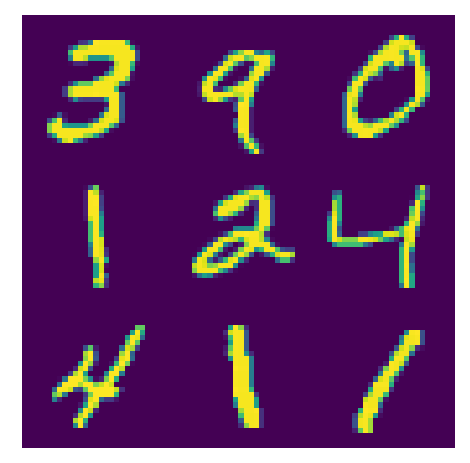

In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = 'mnist_784')
X = mnist.data
plot_MNIST(X)

#### Exercise
Apply PCA to the MNIST dataset.

**Suggestions**
* Perform PCA on the dataset and examine the scree plot.  
* When do the eigenvalues appear (by eye) to reach zero? (Hint: use `plt.xlim` to zoom into a section of the plot).


In [7]:
help(pca)
help(plot_eigenvalues)

Help on function pca in module __main__:

pca(X)
    Sorts eigenvalues and eigenvectors in decreasing order.
    
    Args:
       X (numpy array of floats):   Data matrix 
                                    each column corresponds to a different random variable 
       
    Returns: 
      (numpy array of floats) : Data projected onto the new basis
      (numpy array of floats) : Vector of eigenvalues
      (numpy array of floats) : Corresponding matrix of eigenvectors

Help on function plot_eigenvalues in module __main__:

plot_eigenvalues(evals)
    Plots eigenvalues.
    
    Args:
       (numpy array of floats) : Vector of eigenvalues
       
    Returns: 
      Nothing.



In [0]:
###################################################################
## Insert your code here to:
##                perform PCA
##                plot the eigenvalues
################################################################### 

# score, evectors, evals = ...
# plot_eigenvalues(evals)

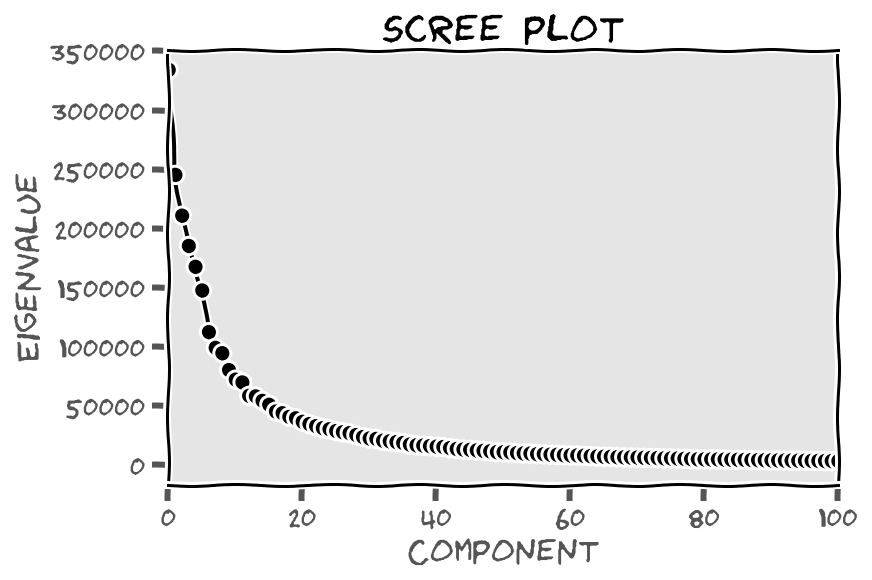

In [13]:
# to_remove solution
score, evectors, evals = pca(X)

with plt.xkcd():
  plot_eigenvalues(evals)
  plt.xlim([0,100])

## d. Calculate the variance explained.
The scree plot suggests that most of the eigenvalues are near zero, with fewer than 100 having large values. Another way to say this is that 100 of 784 PCs explain most of the variance of the data. 


#### Exercise
A popular way to plot this information is via the variance explained. This is a cumulative plot of the fraction of the total variance explained by the top $K$ components, i.e.:
\begin{equation}
\text{var explained} = \frac{\sum_{i=1}^K \lambda_i}{\sum_{i=1}^N \lambda_i}
\end{equation}
The intrinsic dimensionality is often quantified by the $K$ necessary to explain the large majority of the variance.

**Suggestions**
* Fill in the function below to calculate the fraction variance explained as a function of the number of principal componenets. **Hint:** use `np.cumsum`.
* Plot the variance explained using `plot_variance_explained`.
* How many principal components are required to explain 90% of the variance?
* How does the intrinsic dimensionality of this dataset compare to its extrinsic dimensionality?


In [0]:
help(plot_variance_explained)

Help on function plot_variance_explained in module __main__:

plot_variance_explained(evals)
    Plots eigenvalues.
    
    Args:
       (numpy array of floats) : Vector of eigenvalues
       
    Returns: 
      Nothing.



In [0]:
def get_variance_explained(evals):
  """
  Calculates variance explained from the eigenvalues.
  
  Args:
     evals (numpy array of floats) : Vector of eigenvalues
     
  Returns: 
    (numpy array of floats) : Vector of variance explained
    
  """
  ###################################################################
  ## Insert your code here to:
  ##                cumulatively sum the eigenvalues
  ##                normalize by the sum of eigenvalues
  ################################################################### 
  return variance_explained

###################################################################
## Insert your code here to:
##                calculate and plot the variance explained 
################################################################### 
# variance_explained = ...
# plot_variance_explained(variance_explained)

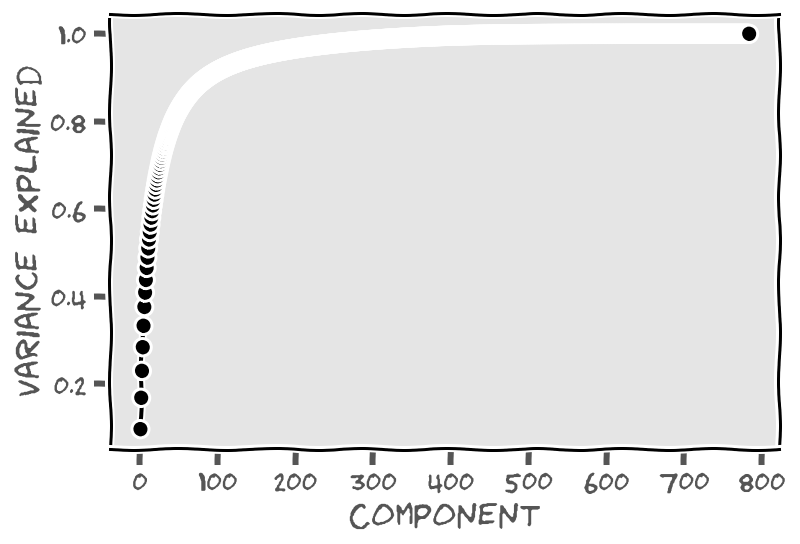

In [14]:
# to_remove solution

def get_variance_explained(evals):
  """
  Plots eigenvalues.
  
  Args:
     (numpy array of floats) : Vector of eigenvalues
     
  Returns: 
    Nothing.
    
  """
  return np.cumsum(evals)/np.sum(evals)
  
variance_explained = get_variance_explained(evals)

with plt.xkcd():
  plot_variance_explained(variance_explained)

## e. Reconstruct data with different numbers of PCs.


In [0]:
#@title Video: Reconstruction

Now we have seen that the top 100 or so principal components of the data can explain most of the variance. We can use this fact to perform *dimensionality reduction*, i.e., by storing the data using only 100 components rather than the samples of all 748 pixels. Remarkably, we will be able to reconstruct much of the structure of the data using only the top 100 components. To see this, recall that to perform PCA we projected the data onto the eigenvectors of the covariance matrix:
\begin{equation}
\bf S = X W
\end{equation}
Since $\bf W$ is an orthogonal matrix, ${\bf W}^{-1} = {\bf W}^T$. So by multiplying by ${\bf W}^T$ on each side we can rewrite this equation as  
\begin{equation}
{\bf X = S W}^T.
\end{equation}
This now gives us a way to reconstruct the data matrix from the scores and loadings. To reconstruct the data from a low-dimensional approximation, we just have to truncate these matrices.  Let's call ${\bf S}_{1:K}$ and ${\bf W}_{1:K}$ as keeping only the first $K$ columns of this matrix. Then our reconstruction is:
\begin{equation}
{\bf X = S}_{1:K} ({\bf W}_{1:K})^T.
\end{equation}

#### Exercise
Fill in the function below to reconstruct the data using different numbers of principal components. 

**Suggestions**
* Fill in the following function to reconstruct the data based on the weights and scores. Don't forget to add the mean!
* Make sure your function works by reconstructing the data with all $K=748$ components. They two images should look identical.

In [0]:
help(plot_MNIST_reconstruction)

Help on function plot_MNIST_reconstruction in module __main__:

plot_MNIST_reconstruction(X, X_reconstructed)
    Plots 9 images in the MNIST dataset side-by-side with the reconstructed images.
    
    Args:
       X (numpy array of floats):   Data matrix 
                                    each column corresponds to a different random variable 
       X_reconstructed (numpy array of floats):   Data matrix 
                                    each column corresponds to a different random variable 
      
    Returns: 
      Nothing.



In [0]:
def reconstruct_data(score,evectors,X_mean,K):
  """
  Reconstruct the data based on the top K components.
  
  Args:
     score (numpy array of floats) : Score matrix
     evectors (numpy array of floats) : Matrix of eigenvectors
     X_mean (numpy array of floats) : Vector corresponding to data mean
     K (scalar) : Number of components to include
     
  Returns: 
     (numpy array of floats) : Matrix of reconstructed data 
    
  """
  ###################################################################
  ## Insert your code here to:
  ##                Reconstruct the data from the score and eigenvectors
  ##                Don't forget to add the mean!!
  ################################################################### 
  return X_reconstructed

K = 748

###################################################################
## Insert your code here to:
##                Reconstruct the data based on all components
##                Plot the data and reconstruction
################################################################### 
# X_mean = ...
# X_reconstructed = ...
# plot_MNIST_reconstruction(X ,X_reconstructed)


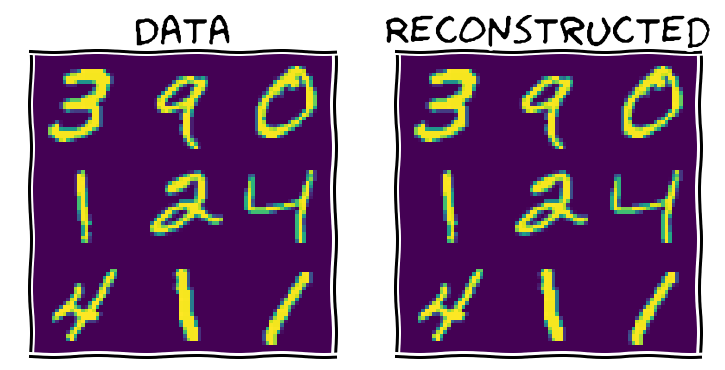

In [15]:
# to_remove solution

def reconstruct_data(score,evectors,X_mean,K):
  """
  Reconstruct the data based on the top K components.
  
  Args:
     score (numpy array of floats) : Score matrix
     evectors (numpy array of floats) : Matrix of eigenvectors
     X_mean (numpy array of floats) : Vector corresponding to data mean
     K (scalar) : Number of components to include
     
  Returns: 
     (numpy array of floats) : Matrix of reconstructed data 
    
  """
  X_reconstructed = np.matmul(score[:,:K],evectors[:,:K].T) + X_mean
  return X_reconstructed

K = 748

with plt.xkcd():
  X_mean = np.mean(X,0) 
  X_reconstructed = reconstruct_data(score,evectors,X_mean,K)
  plot_MNIST_reconstruction(X ,X_reconstructed)


#### Exercise:
Now run the code below and experiment with the slider to reconstruct the data matrix using different numbers of principal components.

**Questions:**
* How many principal components are necessary to reconstruct the numbers (by eye)? How does this relate to the intrinsic dimensionality of the data?
* Do you see any information in the data with only a single principal component?

In [16]:
###### MAKE SURE TO RUN THIS CELL VIA THE PLAY BUTTON TO ENABLE SLIDERS ########

import ipywidgets as widgets

def refresh(K = 100):
  X_reconstructed = reconstruct_data(score,evectors,X_mean,K)
  plot_MNIST_reconstruction(X ,X_reconstructed)
  plt.title('Reconstructed, K={}'.format(K))

_ = widgets.interact(refresh, 
  K = (1, 748, 10))

interactive(children=(IntSlider(value=100, description='K', max=748, min=1, step=10), Output()), _dom_classes=…

#### Exercise:
Next, let's take a closer look at the first principal component by visualizing its corresponding weights. 

**Questions**
* Enter `plot_MNIST_weights` to visualize the weights of the first basis vector.
* What structure do you see? Which pixels have a strong positive weighting? Which have a strong negative weighting? What kinds of images would this basis vector differentiate?
* Try visualizing the second and third basis vectors. Do you see any structure? What about the 100th basis vector? 500th? 700th?

In [73]:
help(plot_MNIST_weights)

Help on function plot_MNIST_weights in module __main__:

plot_MNIST_weights(weights)
    Visualize PCA basis vector weights for MNIST. Red = positive weights, blue = 
    negative weights, white = zero weight.
    
    Args:
       weights (numpy array of floats) : PCA basis vector
       
    Returns: 
       Nothing.



In [0]:
###################################################################
## Insert your code here to:
##                Plot the weights of the first principal component
################################################################### 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 432x288 with 0 Axes>

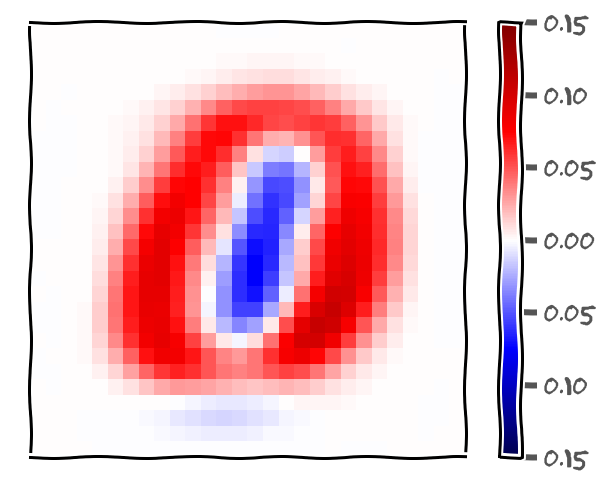

In [17]:
# to_remove solution
with plt.xkcd():
  plot_MNIST_weights(evectors[:,0])

## f. Examine denoising using PCA.
   
Finally, we will test how PCA can be useful for denoising data.

#### Exercise
In this exercise we will and salt-and-pepper noise to the original data and see how that affects the eigenvalues.

**Suggestions**
* Use the function `add_noise` to add salt-and-pepper noise to the data. Start by adding noise to 20% of the pixels.
* Perform PCA and plot the variance explained. How many principal components are required to explain 90% of the variance? How does this compare to the original data?



In [160]:
help(add_noise)

Help on function add_noise in module __main__:

add_noise(X, frac_noisy_pixels)
    Randomly corrupts a fraction of the pixels by setting them to random values.
    
    Args:
       X (numpy array of floats) : Data matrix
       frac_noisy_pixels (scalar) : Fraction of noisy pixels
       
    Returns: 
       (numpy array of floats) : Data matrix + noise



In [0]:
###################################################################
## Insert your code here to:
##                Add noise to the data
##                Plot noise-corrupted data
##                Perform PCA on the noisy data
##                Calculate and plot the variance explained
################################################################### 

# X_noisy = ...
# plot_MNIST(X_noisy)

# score_noisy, evectors_noisy, evals_noisy = ...
# variance_explained_noisy = ...
# plot_variance_explained(X_noisy)

<Figure size 432x288 with 0 Axes>

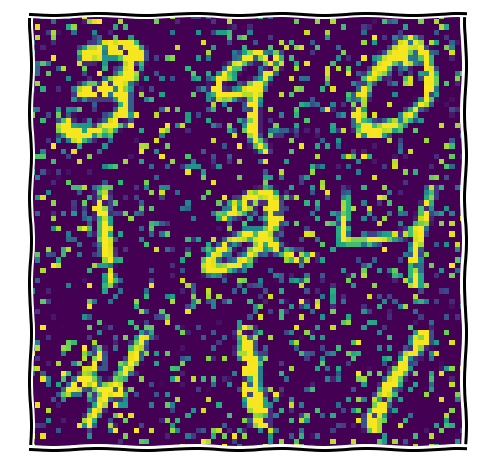

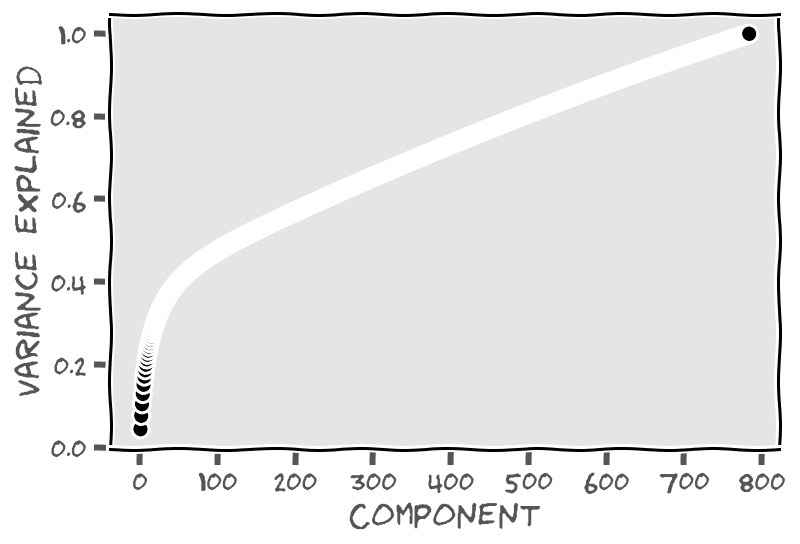

In [18]:
# to_remove solution
X_noisy = add_noise(X,.2)
score_noisy, evectors_noisy, evals_noisy = pca(X_noisy)
variance_explained_noisy = get_variance_explained(evals_noisy)

with plt.xkcd():
  plot_MNIST(X_noisy)
  plot_variance_explained(variance_explained_noisy)

#### Exercise
To denoise the data, we can simply project it onto the basis found with the original dataset (`evectors`, not `evectors_noisy`). Then, by taking the top K components of this projection, we have a guess for where the sample should lie in the K-dimensional latent space. We can then reconstruct the data as normal.

**Suggestions:**
* Project the noise-corrupted data onto the original eigenvectors found for the noise-free data. Do not forget to mean-subtract!
* Reconstruct the data using the top 50 components and plot the result.
* Play around with the amount of noise and K.

In [0]:
###################################################################
## Insert your code here to:
##                Subtract the mean of the noise-corrupted data
##                Project onto the original basis vectors evectors
##                Reconstruct the data using the top 50 components
##                Plot the result
################################################################### 

# X_noisy_mean = ...
# projX_noisy = np.matmul(X_noisy-X_noisy_mean,evectors)

# X_reconstructed = ... reconstruct_data(projX_noisy,evectors,np.mean(X,0),50)
# plot_MNIST_reconstruction(X_noisy ,X_reconstructed)

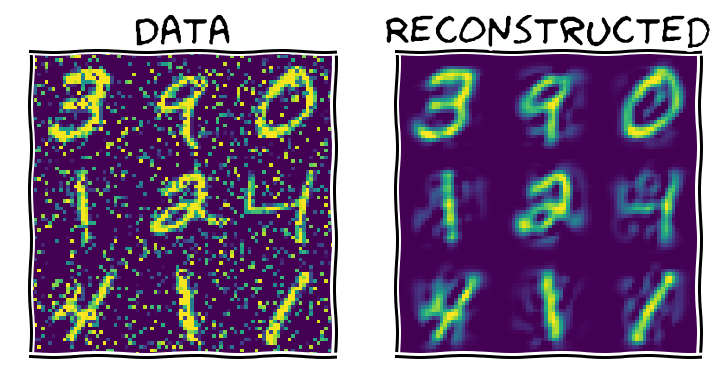

In [19]:
# to_remove solution
X_noisy_mean = np.mean(X_noisy,0)
projX_noisy = np.matmul(X_noisy-X_noisy_mean,evectors)
X_reconstructed = reconstruct_data(projX_noisy,evectors,np.mean(X,0),50)

with plt.xkcd():
  plot_MNIST_reconstruction(X_noisy ,X_reconstructed)